**Business:** E-Commerce 

**Goal:** Predective model building based on discount,brand and categories

**Skill:** EDA & Machine learning

## Machine Learning
* Machine Learning (ML) is a subset of artificial intelligence (AI) that enables systems to learn patterns from data and make predictions or decisions    without being explicitly programmed. It uses algorithms to analyze data, recognize patterns, and improve performance over time.

### Data

In [714]:
import warnings
warnings.filterwarnings("ignore")

In [715]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


 **Collected from open sources**

In [717]:
df=pd.read_csv("C://Users//jeswa//python notebooks//python notebooks//new_amazon-products.csv")
df

,Product_name,brand,initial_price,final_price,currency,availability,reviews_count,categories,number_of_sellers,rating,discount,Department
0,Saucony Men'S Running Shoe,Saucony,NaN,"""57.79""",USD,In Stock,702,"[""Clothing, Shoes & Jewelry"",""Men"",""Shoes"",""At...",17.0,4.6,NaN,mens
1,Kishigo Safety Vest Vests,Kishigo,NaN,"""28.5""",USD,In Stock,916,"[""Tools & Home Improvement"",""Safety & Security...",8.0,4.6,NaN,Unisex
2,Twinsluxes Solar Post Cap,TWINSLUXES,"""49.99""","""33.99""",USD,In Stock,3178,"[""Tools & Home Improvement"",""Lighting & Ceilin...",1.0,4.2,-32%,Tools & Home Improvement
3,Accutire Digital Tire Pressure,Accutire,1.80E+01,1.80E+01,USD,In Stock,8034,"[""Automotive"",""Tools & Equipment"",""Tire & Whee...",1.0,4.4,NaN,Automotive
4,Saura Life Science Hair Growth Hair,SAURA LIFE SCIENCE,"""1299""","""799""",INR,In stock,5,"[""Beauty"",""Hair Care"",""Hair Oils""]",1.0,5.0,-38%,Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Madison Park Amherst Faux Silk,Madison Park,"""154.99""","""111.99""",USD,Only 4 left in stock (more on the way),4828,"[""Home & Kitchen"",""Bedding"",""Comforters & Sets...",4.0,4.4,-28%,Unisex-adult
996,Bic Gel Rollerball Pens,BIC,"""10.99""","""9.99""",USD,In Stock,9272,"[""Office Products"",""Office & School Supplies"",...",21.0,4.5,-9%,NaN
997,Elmer'S E842L Carpenter'S Interior,Elmer's,1.40E+01,1.40E+01,USD,In Stock,1052,"[""Tools & Home Improvement"",""Hardware"",""Adhesi...",1.0,4.6,NaN,Tools & Home Improvement
998,Homek Office Chair Mat,HOMEK,4.00E+01,4.00E+01,USD,In Stock,1039,"[""Office Products"",""Office Furniture & Lightin...",1.0,4.0,-13%,Office Products


Columns info:

**Column**|**Description**
---------------|----------
**Product_name**| Name of the product.
**brand**| Brand or manufacturer of the product.
**initial_price**| Original listed price before any discounts.
**final_price**| Current price after applying discounts.
**currency**| Currency used for pricing (e.g., USD, INR).
**availability**| Stock status or whether the product is available for purchase.
**reviews_count**| Total number of user reviews received.
**categories**| Product classification or group (e.g., Electronics, Clothing).
**number_of_sellers**| Count of different sellers offering the product.
**rating**| Average customer rating (usually out of 5).
**discount**| Price reduction amount or percentage from the initial price.
**Department**| Broad division or section the product belongs to (e.g., Home, Sports).

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_name       1000 non-null   object 
 1   brand              999 non-null    object 
 2   initial_price      814 non-null    object 
 3   final_price        997 non-null    object 
 4   currency           1000 non-null   object 
 5   availability       994 non-null    object 
 6   reviews_count      1000 non-null   int64  
 7   categories         1000 non-null   object 
 8   number_of_sellers  984 non-null    float64
 9   rating             1000 non-null   float64
 10  discount           820 non-null    object 
 11  Department         662 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


                                                         **Basic Checks**

In [721]:
df.isnull().sum()

Product_name           0
brand                  1
initial_price        186
final_price            3
currency               0
availability           6
reviews_count          0
categories             0
number_of_sellers     16
rating                 0
discount             180
Department           338
dtype: int64

In [722]:
df.columns

Index(['Product_name', 'brand', 'initial_price', 'final_price', 'currency',
       'availability', 'reviews_count', 'categories', 'number_of_sellers',
       'rating', 'discount', 'Department'],
      dtype='object')

In [723]:
df.shape

(1000, 12)

In [724]:
duplicates = df[df.duplicated()]

print("Duplicated rows:")
print(duplicates)

Duplicated rows:
Empty DataFrame
Columns: [Product_name, brand, initial_price, final_price, currency, availability, reviews_count, categories, number_of_sellers, rating, discount, Department]
Index: []


In [725]:
df.head(10)

,Product_name,brand,initial_price,final_price,currency,availability,reviews_count,categories,number_of_sellers,rating,discount,Department
0,Saucony Men'S Running Shoe,Saucony,NaN,"""57.79""",USD,In Stock,702,"[""Clothing, Shoes & Jewelry"",""Men"",""Shoes"",""At...",17.0,4.6,NaN,mens
1,Kishigo Safety Vest Vests,Kishigo,NaN,"""28.5""",USD,In Stock,916,"[""Tools & Home Improvement"",""Safety & Security...",8.0,4.6,NaN,Unisex
2,Twinsluxes Solar Post Cap,TWINSLUXES,"""49.99""","""33.99""",USD,In Stock,3178,"[""Tools & Home Improvement"",""Lighting & Ceilin...",1.0,4.2,-32%,Tools & Home Improvement
3,Accutire Digital Tire Pressure,Accutire,1.80E+01,1.80E+01,USD,In Stock,8034,"[""Automotive"",""Tools & Equipment"",""Tire & Whee...",1.0,4.4,NaN,Automotive
4,Saura Life Science Hair Growth Hair,SAURA LIFE SCIENCE,"""1299""","""799""",INR,In stock,5,"[""Beauty"",""Hair Care"",""Hair Oils""]",1.0,5.0,-38%,Beauty
5,Kasott Airpod Pro Earpads,KASOTT,"""17.88""","""17.88""",USD,In Stock,67,"[""Electronics"",""Headphones, Earbuds & Accessor...",3.0,4.3,-13%,NaN
6,Bio-Oil Bio Face Oil,Bio-Oil,"""39.24""","""24.95""",USD,In Stock,6095,"[""Beauty & Personal Care"",""Skin Care"",""Face"",""...",1.0,4.6,-36%,Beauty & Personal Care
7,Crysting Inch Sewing Box,crysting,"""22.99""","""20.99""",USD,In Stock,210,"[""Arts, Crafts & Sewing"",""Organization, Storag...",1.0,4.6,-9%,NaN
8,Ridgid Straight Auger Auger Drill Bits,RIDGID,"""27.38""","""25.38""",USD,Only 5 left in stock - order soon,28,"[""Tools & Home Improvement"",""Power & Hand Tool...",17.0,4.4,-7%,NaN
9,Core 10 Women'S Yoga Legging,Core 10,"""28.4""","""23.92""",USD,Only 1 left in stock - order soon,1538,"[""Clothing, Shoes & Jewelry"",""Women"",""Clothing...",1.0,4.4,16,womens


**We have 12 Columns of Data , Considering Most Imp Columns to Study**
    . According to business we can filter if we want to, otherwise we need to do study all the columns

### Data Validation 

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
* Checking and droping duplicated rows to overcome data leakage

In [729]:
df['initial_price'].unique()

array([nan, '"49.99"', '1.80E+01', '"1299"', '"17.88"', '"39.24"',
       '"22.99"', '"27.38"', '"28.4"', '9.83E+00', '"89.99"', '"13.99"',
       '4.50E+01', '"149.95"', '"69.99"', '"6.98"', '"18.64"', '"13.98"',
       '"99.99"', '4.00E+02', '"159.95"', '"15.99"', '"37.98"',
       '1.00E+02', '2.00E+02', '1.20E+01', '5.17E+01', '2.26E+01',
       '"14.99"', '"45.99"', '"23.99"', '"29.98"', '"19.99"', '"18.95"',
       '"185.64"', '"72.08"', '1.46E+02', '"360"', '"19.39"', '"62.72"',
       '"30.99"', '"9.99"', '"16.74"', '"267"', '"71.99"', '3.70E+01',
       '2.20E+01', '1.60E+01', '3.80E+01', '"18.98"', '1.27E+01',
       '"79.73"', '"65"', '"29.99"', '"39.80"', '"31.67"', '"85"',
       '"95.99"', '"24.9"', '"599"', '"10.95"', '"10.99"', '"189"',
       '"17.97"', '"34.03"', '"84.99"', '2.70E+01', '"48"', '"115"',
       '"56.99"', '27', '"39.99"', '6.00E+01', '"25"', '"32.9"',
       '"629.00"', '"60"', '"36.29"', '"33"', '2.70E+02', '"14.95"',
       '"39.29"', '"24.99"', '"34"

In [730]:
df['initial_price'] = df['initial_price'].str.replace('"', '')

In [731]:
df['initial_price'] = df['initial_price'].astype(float)

In [732]:
df['initial_price'] = df['initial_price'].map('{:.2f}'.format)

In [733]:
df['initial_price'].unique()

array(['nan', '49.99', '18.00', '1299.00', '17.88', '39.24', '22.99',
       '27.38', '28.40', '9.83', '89.99', '13.99', '45.00', '149.95',
       '69.99', '6.98', '18.64', '13.98', '99.99', '400.00', '159.95',
       '15.99', '37.98', '100.00', '200.00', '12.00', '51.70', '22.60',
       '14.99', '45.99', '23.99', '29.98', '19.99', '18.95', '185.64',
       '72.08', '146.00', '360.00', '19.39', '62.72', '30.99', '9.99',
       '16.74', '267.00', '71.99', '37.00', '22.00', '16.00', '38.00',
       '18.98', '12.70', '79.73', '65.00', '29.99', '39.80', '31.67',
       '85.00', '95.99', '24.90', '599.00', '10.95', '10.99', '189.00',
       '17.97', '34.03', '84.99', '27.00', '48.00', '115.00', '56.99',
       '39.99', '60.00', '25.00', '32.90', '629.00', '36.29', '33.00',
       '270.00', '14.95', '39.29', '24.99', '34.00', '15.28', '51.00',
       '129.99', '68.80', '39.00', '35.99', '20.99', '4.28', '19.90',
       '104.63', '899.00', '16.99', '90.00', '24.47', '43.00', '23.20',
       

In [734]:
df['final_price'].unique()

array(['"57.79"', '"28.5"', '"33.99"', '1.80E+01', '"799"', '"17.88"',
       '"24.95"', '"20.99"', '"25.38"', '"23.92"', nan, '"84.99"',
       '"11.19"', '4.50E+01', '"141.1"', '"69.99"', '"6.19"', '"13.52"',
       '"13.98"', '"94.94"', '4.00E+02', '"12.80"', '"144.95"', '"12.74"',
       '"12.99"', '"20.91"', '"85.99"', '"99.99"', '1.61E+02', '7.99E+00',
       '"41.49"', '"64.95"', '"51.74"', '1.96E+01', '"9.99"', '"41.39"',
       '"19.99"', '"21.98"', '"16.99"', '"69.95"', '"9.47"', '"140.88"',
       '"68.48"', '"12.98"', '103', '"90.09"', '"17.45"', '"55"',
       '"15.49"', '"4.99"', '"7.99"', '"14.49"', '"165.99"', '"189"',
       '"49.99"', '"35.14"', '2.20E+01', '"15.99"', '"20.37"', '3.80E+01',
       '"15.69"', '"11.99"', '"72.55"', '"53.93"', '"29.49"', '"22.34"',
       '"29.99"', '"58.56"', '"75.99"', '"14.94"', '"389"', '"9.95"',
       '"111.99"', '"14.38"', '"29.03"', '"44.99"', '"28.24"', '"60.27"',
       '"32.45"', '"92.49"', '"50.99"', '1.99E+01', '"43.58"', '6

In [735]:
df['final_price'] = df['final_price'].str.replace('"', '')

In [736]:
df['final_price'] = df['final_price'].str.replace(',', '')

In [737]:
df['final_price'] = df['final_price'].astype(float)

In [738]:
df['final_price'] = df['final_price'].map('{:.2f}'.format)#Applies a function to each element in the column.
#Converts the number to a string.

In [739]:
df['final_price'].unique()

array(['57.79', '28.50', '33.99', '18.00', '799.00', '17.88', '24.95',
       '20.99', '25.38', '23.92', 'nan', '84.99', '11.19', '45.00',
       '141.10', '69.99', '6.19', '13.52', '13.98', '94.94', '400.00',
       '12.80', '144.95', '12.74', '12.99', '20.91', '85.99', '99.99',
       '161.00', '7.99', '41.49', '64.95', '51.74', '19.60', '9.99',
       '41.39', '19.99', '21.98', '16.99', '69.95', '9.47', '140.88',
       '68.48', '12.98', '103.00', '90.09', '17.45', '55.00', '15.49',
       '4.99', '14.49', '165.99', '189.00', '49.99', '35.14', '22.00',
       '15.99', '20.37', '38.00', '15.69', '11.99', '72.55', '53.93',
       '29.49', '22.34', '29.99', '58.56', '75.99', '14.94', '389.00',
       '9.95', '111.99', '14.38', '29.03', '44.99', '28.24', '60.27',
       '32.45', '92.49', '50.99', '19.90', '43.58', '60.00', '62.99',
       '17.81', '26.32', '18.99', '126.98', '38.67', '32.99', '31.11',
       '130.00', '12.95', '25.99', '33.40', '34.00', '18.54', '39.90',
       '39.99',

In [740]:
df['discount'].unique()

array([nan, '-32%', '-38%', '-13%', '-36%', '-9%', '-7%', '16', '-5%',
       '-6%', '-20%', '-12%', '-11%', '$5.12', '30', '$1.19', '$3.25',
       '-19%', '-45%', '-33%', '-10%', '17', '27', '-15%', '-50%', '-24%',
       '-30%', '75', '13', '-29%', '-31%', '-17%', '$17.46', '5', '-21%',
       '40', '-35%', '-41%', '$3.59', '15', '31', '37', '29', '-26%',
       '$7.00', '20', '36', '9', '-52%', '-48%', '-55%', '-22%', '23',
       '-25%', '-34%', '-18%', '32', '-37%', '14', '$9.41', '8', '$1.08',
       '-14%', '$0.81', '25', '$12.01', '28', '-53%', '-27%', '$26.01',
       '$8.47', '$5.00', '-82%', '22', '$7.68', '47', '$27.40', '-40%',
       '-23%', '-8%', '$3.09', '$10.87', '11', '24', '$2.50', '$13.41',
       '-28%', '-65%', '$15.00', '$14.00', '-66%', '6', '33', '-51%',
       '$1.00', '-44%', '-3%', '  (30%)             \n              ',
       '$3.00', '-39%', '10', '$13.44', '7', '55', '$11.16', '$5.80',
       '-42%', '71', '$2.01', '41', '$6.32', '$2.73', '12', '-62%',

In [741]:
df['discount'] = df['discount'].str.replace(r'[$\-()%\]]', '', regex = True)
df['discount'] = df['discount'].str.replace('  30             \n              ', '30')

In [742]:
df['discount'].unique()

array([nan, '32', '38', '13', '36', '9', '7', '16', '5', '6', '20', '12',
       '11', '5.12', '30', '1.19', '3.25', '19', '45', '33', '10', '17',
       '27', '15', '50', '24', '75', '29', '31', '17.46', '21', '40',
       '35', '41', '3.59', '37', '26', '7.00', '52', '48', '55', '22',
       '23', '25', '34', '18', '14', '9.41', '8', '1.08', '0.81', '12.01',
       '28', '53', '26.01', '8.47', '5.00', '82', '7.68', '47', '27.40',
       '3.09', '10.87', '2.50', '13.41', '65', '15.00', '14.00', '66',
       '51', '1.00', '44', '3', '3.00', '39', '13.44', '11.16', '5.80',
       '42', '71', '2.01', '6.32', '2.73', '62', '55.86', '2', '2.60',
       '2.98', '10.00', '12.00', '59', '92', '10.12', '64', '13.50', '61',
       '43', '6.60', '69', '46', '8.25', '3.40', '57.70', '49', '40.00',
       '2.66', '14.75', '0.78', '18.44', '3.05', '3.99', '53.03', '54',
       '58', '3.33', '63', '16.42', '1.80', '67', '4.50', '77', '10.46',
       '1.39', '8.63', '57', '2.00', '16.97', '1.79', '3.

In [743]:
df['discount'] = df['discount'].astype(float)

In [744]:
df['initial_price'] = df['initial_price'].astype(float)
df['final_price'] = df['final_price'].astype(float)

In [745]:
df['categories'].unique()

array(['["Clothing, Shoes & Jewelry","Men","Shoes","Athletic","Running","Road Running"]',
       '["Tools & Home Improvement","Safety & Security","Personal Protective Equipment","Protective Workwear","Safety Apparel","Vests"]',
       '["Tools & Home Improvement","Lighting & Ceiling Fans","Outdoor Lighting","Post Lights"]',
       '["Automotive","Tools & Equipment","Tire & Wheel Tools","Tire Repair Tools"]',
       '["Beauty","Hair Care","Hair Oils"]',
       '["Electronics","Headphones, Earbuds & Accessories","Earpads"]',
       '["Beauty & Personal Care","Skin Care","Face","Creams & Moisturizers","Face Oil"]',
       '["Arts, Crafts & Sewing","Organization, Storage & Transport","Storage Boxes & Organizers"]',
       '["Tools & Home Improvement","Power & Hand Tools","Power Tool Parts & Accessories","Power Drill Parts & Accessories","Drill Bits","Auger Drill Bits"]',
       '["Clothing, Shoes & Jewelry","Women","Clothing","Active","Leggings"]',
       '["Grocery & Gourmet Food","Pantry

In [746]:
l = []
s = df['categories'].dropna().str.split(',')
for i in s:
    l.append(i[0])

In [747]:
l

['["Clothing',
 '["Tools & Home Improvement"',
 '["Tools & Home Improvement"',
 '["Automotive"',
 '["Beauty"',
 '["Electronics"',
 '["Beauty & Personal Care"',
 '["Arts',
 '["Tools & Home Improvement"',
 '["Clothing',
 '["Grocery & Gourmet Food"',
 '["Electronics"',
 '["Women"',
 '["Health & Household"',
 '["Tools & Home Improvement"',
 '["Tools & Home Improvement"',
 '["Tools & Home Improvement"',
 '["Arts',
 '["Cell Phones & Accessories"',
 '["Beauty & Personal Care"',
 '["Patio',
 '["Health & Household"',
 '["Clothing',
 '["Health & Household"',
 '["Tools & Home Improvement"',
 '["Automotive"',
 '["Video Games"',
 '["Sports & Outdoors"',
 '["Tools & Home Improvement"',
 '["Home & Kitchen"',
 '["Health & Household"',
 '["Tools & Home Improvement"',
 '["Home & Kitchen"',
 '["Patio',
 '["Clothing',
 '["Patio',
 '["Cell Phones & Accessories"',
 '["Clothing',
 '["Kitchen & Dining"',
 '["Clothing',
 '["Tools & Home Improvement"',
 '["Motorcycle & Powersports"',
 '["Tools & Home Improvemen

In [748]:
new_l = cleaned = [item.strip('["') for item in l]#.strip(chars) removes any combination of the characters in chars from the start and end of the string.

In [749]:
new_l

['Clothing',
 'Tools & Home Improvement',
 'Tools & Home Improvement',
 'Automotive',
 'Beauty',
 'Electronics',
 'Beauty & Personal Care',
 'Arts',
 'Tools & Home Improvement',
 'Clothing',
 'Grocery & Gourmet Food',
 'Electronics',
 'Women',
 'Health & Household',
 'Tools & Home Improvement',
 'Tools & Home Improvement',
 'Tools & Home Improvement',
 'Arts',
 'Cell Phones & Accessories',
 'Beauty & Personal Care',
 'Patio',
 'Health & Household',
 'Clothing',
 'Health & Household',
 'Tools & Home Improvement',
 'Automotive',
 'Video Games',
 'Sports & Outdoors',
 'Tools & Home Improvement',
 'Home & Kitchen',
 'Health & Household',
 'Tools & Home Improvement',
 'Home & Kitchen',
 'Patio',
 'Clothing',
 'Patio',
 'Cell Phones & Accessories',
 'Clothing',
 'Kitchen & Dining',
 'Clothing',
 'Tools & Home Improvement',
 'Motorcycle & Powersports',
 'Tools & Home Improvement',
 'Electronics',
 'Pet Supplies',
 'Home & Kitchen',
 'Office Products',
 'Health & Household',
 'Sports & Outdoor

In [750]:
df['categories'] = new_l

In [751]:
def clean_availability(value):
    value = str(value).lower()
    if 'temporarily out of stock' in value:
        return 'out of stock'
    elif 'only' in value:
        return 'limited stock'
    elif 'usually ships' in value or 'available to ship' in value:
        return 'delayed shipping'
    elif 'in stock' in value:
        return 'in stock'
    else:
        return 'unknown'

df['availability'] = df['availability'].apply(clean_availability)


In [752]:
df['availability'].unique()

array(['in stock', 'limited stock', 'out of stock', 'delayed shipping',
       'unknown'], dtype=object)

In [753]:
df['availability'].value_counts()

availability
in stock            709
limited stock       253
delayed shipping     30
unknown               6
out of stock          2
Name: count, dtype: int64

In [754]:
df

,Product_name,brand,initial_price,final_price,currency,availability,reviews_count,categories,number_of_sellers,rating,discount,Department
0,Saucony Men'S Running Shoe,Saucony,NaN,57.79,USD,in stock,702,Clothing,17.0,4.6,NaN,mens
1,Kishigo Safety Vest Vests,Kishigo,NaN,28.50,USD,in stock,916,Tools & Home Improvement,8.0,4.6,NaN,Unisex
2,Twinsluxes Solar Post Cap,TWINSLUXES,49.99,33.99,USD,in stock,3178,Tools & Home Improvement,1.0,4.2,32.0,Tools & Home Improvement
3,Accutire Digital Tire Pressure,Accutire,18.00,18.00,USD,in stock,8034,Automotive,1.0,4.4,NaN,Automotive
4,Saura Life Science Hair Growth Hair,SAURA LIFE SCIENCE,1299.00,799.00,INR,in stock,5,Beauty,1.0,5.0,38.0,Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Madison Park Amherst Faux Silk,Madison Park,154.99,111.99,USD,limited stock,4828,Home & Kitchen,4.0,4.4,28.0,Unisex-adult
996,Bic Gel Rollerball Pens,BIC,10.99,9.99,USD,in stock,9272,Office Products,21.0,4.5,9.0,NaN
997,Elmer'S E842L Carpenter'S Interior,Elmer's,14.00,14.00,USD,in stock,1052,Tools & Home Improvement,1.0,4.6,NaN,Tools & Home Improvement
998,Homek Office Chair Mat,HOMEK,40.00,40.00,USD,in stock,1039,Office Products,1.0,4.0,13.0,Office Products


## EDA

* EDA is the process of data understanding on Validated data
* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* Insights we can look in for this data from EDA:
    - Relations between final price and discount
    - Brand wise data
    - Relations between brand and discounts
    - etc..

* *To get Insights on the data we can use eda techniques,*
    - *Uni-Variate Analysis (Study of single column data)*
    - *Bi/Multi-Variate Analysis (Study data between two or more columns)*
* Above techniques will use *Descriptive Stats* & *Visualizations*
    - *Descriptive Stats*
        - Stats Measures are used to understand column data
        - Refer Notes pdf given for uni & bi/multi variate measures.
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - *Visualizations*
        - Pictorial representation of data
            - Descriptive Stats -> Visual representation

**Uni-variate Analysis  - Study of Individual column data**

In [759]:
from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

In [760]:
top_brands = df['brand'].value_counts().head(10).reset_index()#Converts the result from a Series to a DataFrame
top_brands.columns = ['brand', 'Count']


fig = px.bar(
    top_brands,
    x='brand',
    y='Count',
    title='Top 10 brands',
    text='Count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=45,
    height=800,
    width=800
)

fig

In [761]:
top_categories = df['categories'].value_counts().head(10).reset_index()
top_categories.columns = ['categories', 'Count']


fig = px.bar(
    top_categories,
    x='categories',
    y='Count',
    title='Top 10 categories',
    text='Count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=45,
    height=800,
    width=800
)

fig

In [762]:
discount = df['discount'].value_counts().head(8).reset_index()
discount.columns = ['discount', 'Count']

fig = px.pie(
    discount,
    names='discount',
    values='Count',
    title='Top 10 discount',
)

fig.update_traces(textinfo='percent+label')
fig.show()

In [763]:
availability = df['availability'].value_counts().head(8).reset_index()
availability.columns = ['availability', 'Count']

fig = px.pie(
    availability,
    names='availability',
    values='Count',
    title='availability',
)

fig.update_traces(textinfo='percent+label')
fig.show()

**Bi-Variate Analysis - Study of Two Different Columns data**

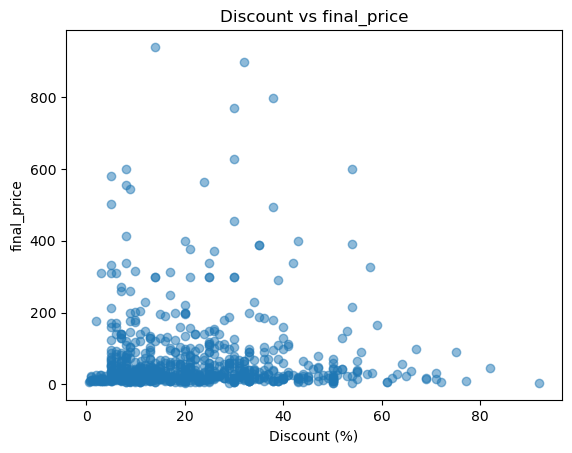

In [765]:
plt.scatter(df['discount'], df['final_price'], alpha=0.5)
plt.title("Discount vs final_price")
plt.xlabel("Discount (%)")
plt.ylabel("final_price")
plt.show()

In [766]:
top_10 = df.sort_values(by='brand', ascending=False).head(10)

# Create bar chart
fig = px.bar(top_10, x='brand', y='discount', 
             title='Top 10 brands by discount')
fig.show()

**Descriptive analysis**

In [768]:
# Top 10 highest-rated products (with at least 50 reviews for reliability)
top_rated = df[df['reviews_count'] > 50].sort_values(by='rating', ascending=False).head(10)
top_rated[['Product_name', 'brand', 'rating', 'reviews_count', 'final_price']]

,Product_name,brand,rating,reviews_count,final_price
528,Pilot Board Master Begreen,PILOT,4.9,156,21.00
134,Victorinox Classic Precious Alox,Victorinox,4.9,135,42.90
608,Park Tool Master Link Pliers,Park Tool,4.9,5694,16.95
560,Jot & Mark Recipe Cards Floral,Jot & Mark,4.9,2747,5.67
872,Liquitex Professional Heavy Body,Liquitex,4.8,8736,9.80
842,Jbl Charge Portable Bluetooth Speakers,JBL,4.8,45361,114.95
662,Intimo Star Trek,INTIMO,4.8,52,26.95
855,Betooll Capacity Heavy Duty,BETOOLL,4.8,7059,21.99
659,Avery Labels,AVERY,4.8,717,13.29
390,Avery Easy Peel Address,AVERY,4.8,869,25.22


In [769]:
# Top 10 biggest discounts
highest_discounts = df.sort_values(by='discount', ascending=False).head(10)
highest_discounts[['Product_name', 'brand', 'initial_price', 'final_price', 'discount']]

,Product_name,brand,initial_price,final_price,discount
442,Zagg Invisibleshield Glass Elite,ZAGG,59.99,4.50,92.0
203,Codemasters Formula Games,Codemasters,44.99,44.99,82.0
809,Mud Kingdom Baby Toddler,Mud Kingdom,42.99,9.99,77.0
45,Safavieh Lyndhurst Collection Runner,Safavieh,360.00,90.09,75.0
937,At-A-Glance Weekly Appointment Book,AT-A-GLANCE,22.69,6.33,72.0
478,Gloria Vanderbilt Women'S Amanda Classic,Gloria Vanderbilt,48.00,13.90,71.0
377,Propet Womens Erika Mary,Propet,104.95,30.64,71.0
498,Blowfish Malibu Women'S Blumoon,Blowfish,44.99,13.98,69.0
697,Btfbm Women'S Casual Party,BTFBM,53.99,16.99,69.0
774,Hunky Dory Transparent Plastic Unbreakable,Hunky Dory,299.00,99.00,67.0


In [770]:
# Top 10 most reviewed products
most_reviewed = df.sort_values(by='reviews_count', ascending=False).head(10)
most_reviewed[['Product_name', 'brand', 'reviews_count', 'rating']]

,Product_name,brand,reviews_count,rating
176,Seagate Expansion External Hard,Seagate,243907,4.7
337,Outward Hound Fun Feeder Slo,Outward Hound,121619,4.6
44,Seresto Large Dog Vet,Seresto,101767,4.5
943,Allstar Innovations Wobble Wag Giggle,Allstar Innovations,94871,4.1
159,Vans Unisex Old Skool,Vans,79644,4.7
508,Skechers Women'S Joy Walking,Skechers,79555,4.5
171,Skechers Women'S Joy Walking,Skechers,77067,4.5
656,Under Armour Men'S Charged Assert,Under Armour,52817,4.6
119,Set Wet Styling Kit,Set Wet,47246,4.0
722,Wallflower Women'S Luscious Curvy,WallFlower,47149,4.4


**Dropping Columns**

In [772]:
df.drop(columns = ['Department','Product_name'],inplace = True)
   

In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   initial_price      814 non-null    float64
 2   final_price        997 non-null    float64
 3   currency           1000 non-null   object 
 4   availability       1000 non-null   object 
 5   reviews_count      1000 non-null   int64  
 6   categories         1000 non-null   object 
 7   number_of_sellers  984 non-null    float64
 8   rating             1000 non-null   float64
 9   discount           820 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.3+ KB


In [774]:
df.isnull().sum()

brand                  1
initial_price        186
final_price            3
currency               0
availability           0
reviews_count          0
categories             0
number_of_sellers     16
rating                 0
discount             180
dtype: int64

### Filling Null Values

In [776]:
df['number_of_sellers'].fillna(df['number_of_sellers'].median(),inplace = True)

In [777]:
df[['initial_price','final_price','discount']]

,initial_price,final_price,discount
0,NaN,57.79,NaN
1,NaN,28.50,NaN
2,49.99,33.99,32.0
3,18.00,18.00,NaN
4,1299.00,799.00,38.0
...,...,...,...
995,154.99,111.99,28.0
996,10.99,9.99,9.0
997,14.00,14.00,NaN
998,40.00,40.00,13.0


In [778]:
df['brand'].fillna(df['brand'].mode(),inplace = True)

In [779]:
df = df.dropna(subset=['initial_price', 'final_price', 'discount'], thresh=2)

In [780]:
df

,brand,initial_price,final_price,currency,availability,reviews_count,categories,number_of_sellers,rating,discount
2,TWINSLUXES,49.99,33.99,USD,in stock,3178,Tools & Home Improvement,1.0,4.2,32.0
3,Accutire,18.00,18.00,USD,in stock,8034,Automotive,1.0,4.4,NaN
4,SAURA LIFE SCIENCE,1299.00,799.00,INR,in stock,5,Beauty,1.0,5.0,38.0
5,KASOTT,17.88,17.88,USD,in stock,67,Electronics,3.0,4.3,13.0
6,Bio-Oil,39.24,24.95,USD,in stock,6095,Beauty & Personal Care,1.0,4.6,36.0
...,...,...,...,...,...,...,...,...,...,...
995,Madison Park,154.99,111.99,USD,limited stock,4828,Home & Kitchen,4.0,4.4,28.0
996,BIC,10.99,9.99,USD,in stock,9272,Office Products,21.0,4.5,9.0
997,Elmer's,14.00,14.00,USD,in stock,1052,Tools & Home Improvement,1.0,4.6,NaN
998,HOMEK,40.00,40.00,USD,in stock,1039,Office Products,1.0,4.0,13.0


In [781]:
df[['initial_price','final_price','discount']]

,initial_price,final_price,discount
2,49.99,33.99,32.0
3,18.00,18.00,NaN
4,1299.00,799.00,38.0
5,17.88,17.88,13.0
6,39.24,24.95,36.0
...,...,...,...
995,154.99,111.99,28.0
996,10.99,9.99,9.0
997,14.00,14.00,NaN
998,40.00,40.00,13.0


In [782]:
discount = ((df['initial_price'] - df['final_price']) / df['initial_price']) * 100

In [783]:
df['discount'] = df['discount'].fillna(discount)

In [784]:
final_price = df['initial_price'] - ((df['discount'] * df['initial_price'])/100)

In [785]:
df['final_price'] = df['final_price'].fillna(final_price)

In [786]:
initial_price = df['final_price'] / (1 - (df['discount']/100))

In [787]:
df['initial_price'] = df['initial_price'].fillna(initial_price)

In [788]:
df.isnull().sum()

brand                1
initial_price        0
final_price          0
currency             0
availability         0
reviews_count        0
categories           0
number_of_sellers    0
rating               0
discount             0
dtype: int64

In [789]:
num = df.select_dtypes(include = 'number')
num

,initial_price,final_price,reviews_count,number_of_sellers,rating,discount
2,49.99,33.99,3178,1.0,4.2,32.0
3,18.00,18.00,8034,1.0,4.4,0.0
4,1299.00,799.00,5,1.0,5.0,38.0
5,17.88,17.88,67,3.0,4.3,13.0
6,39.24,24.95,6095,1.0,4.6,36.0
...,...,...,...,...,...,...
995,154.99,111.99,4828,4.0,4.4,28.0
996,10.99,9.99,9272,21.0,4.5,9.0
997,14.00,14.00,1052,1.0,4.6,0.0
998,40.00,40.00,1039,1.0,4.0,13.0


In [790]:
num.columns

Index(['initial_price', 'final_price', 'reviews_count', 'number_of_sellers',
       'rating', 'discount'],
      dtype='object')

### outliers

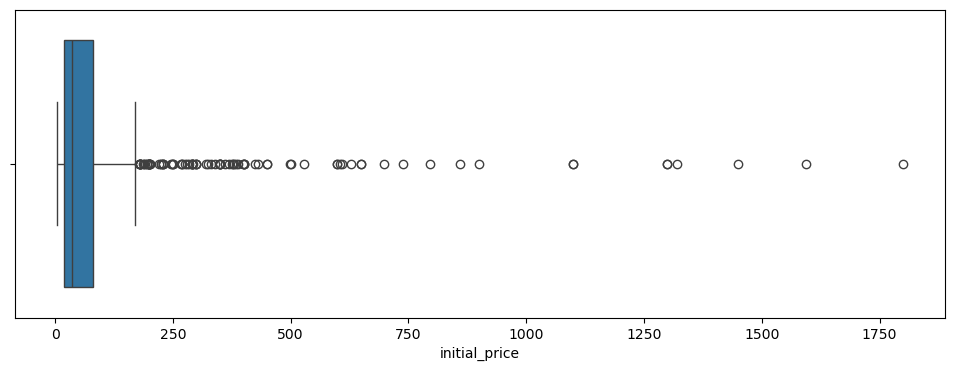

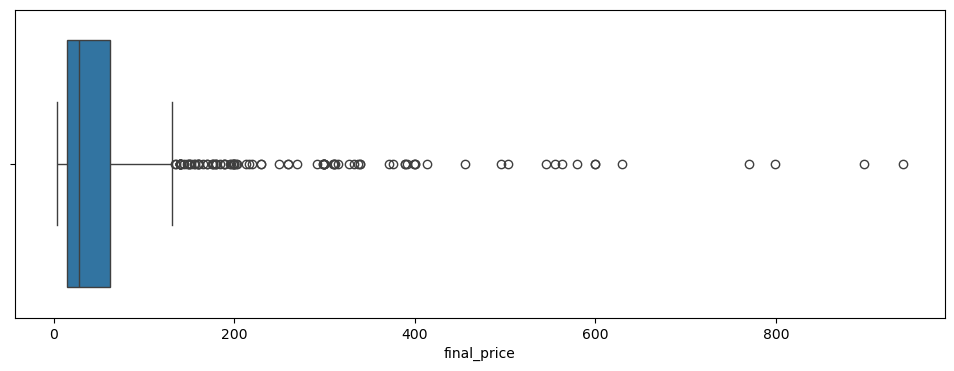

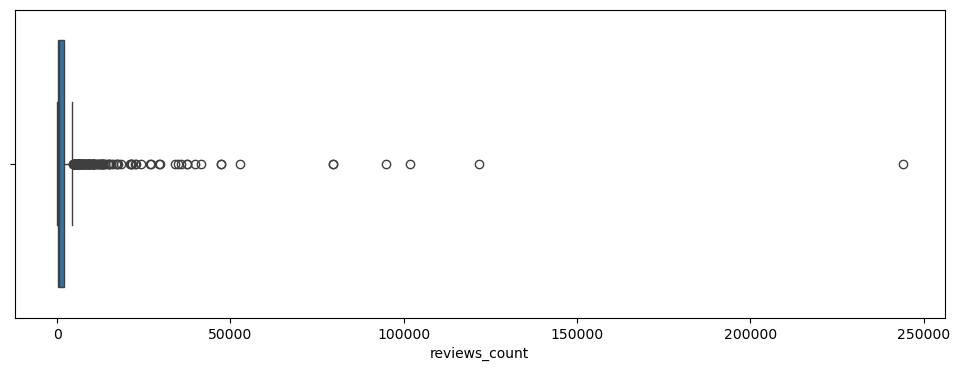

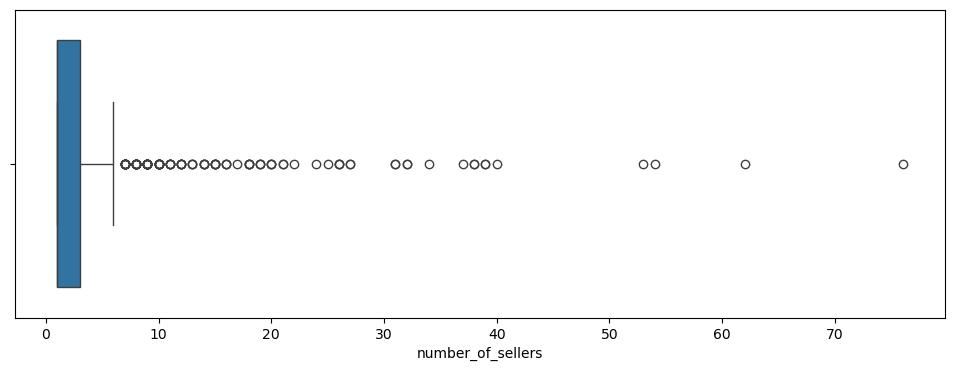

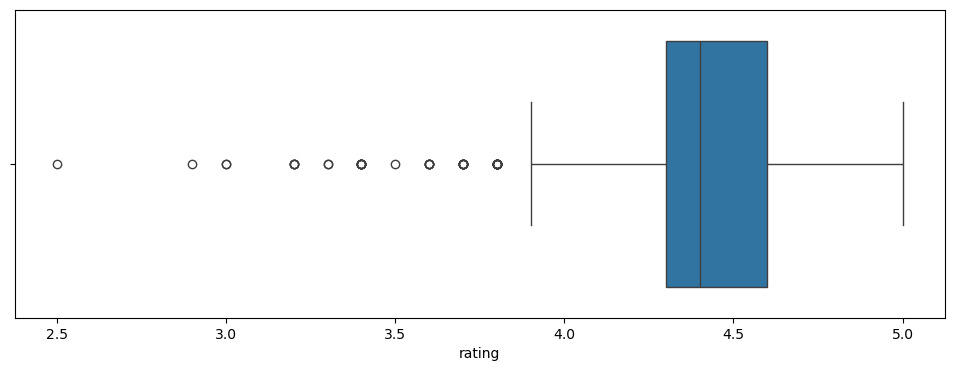

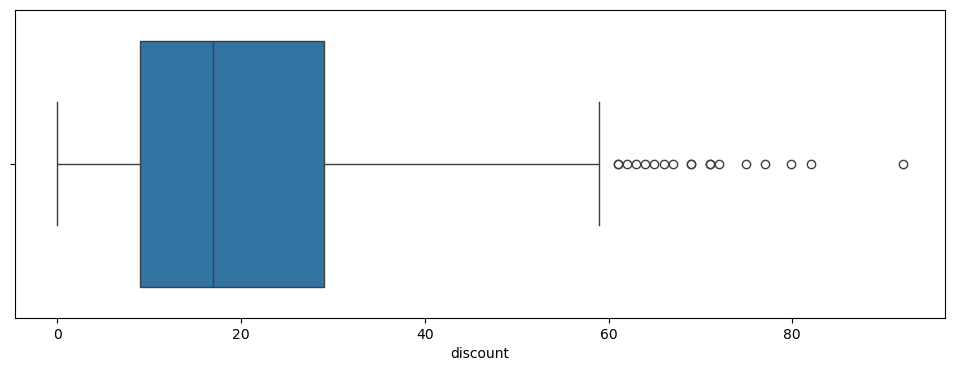

In [792]:
for col in num.columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=num[col])
    plt.show()

In [793]:
for col in num.columns:
    Q1, Q3 = num[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num[col] = num[col].where(num[col] >= lower_bound, lower_bound)
    num[col] = num[col].where(num[col] <= upper_bound, upper_bound)


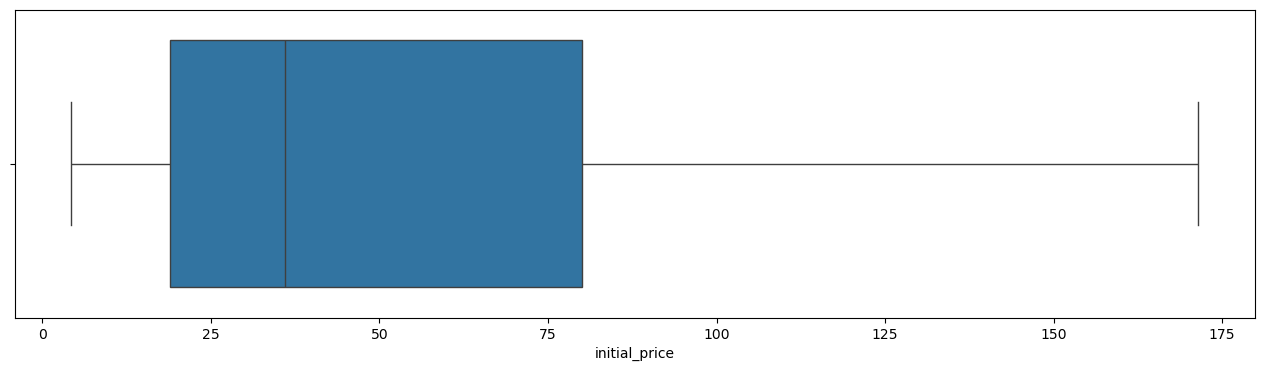

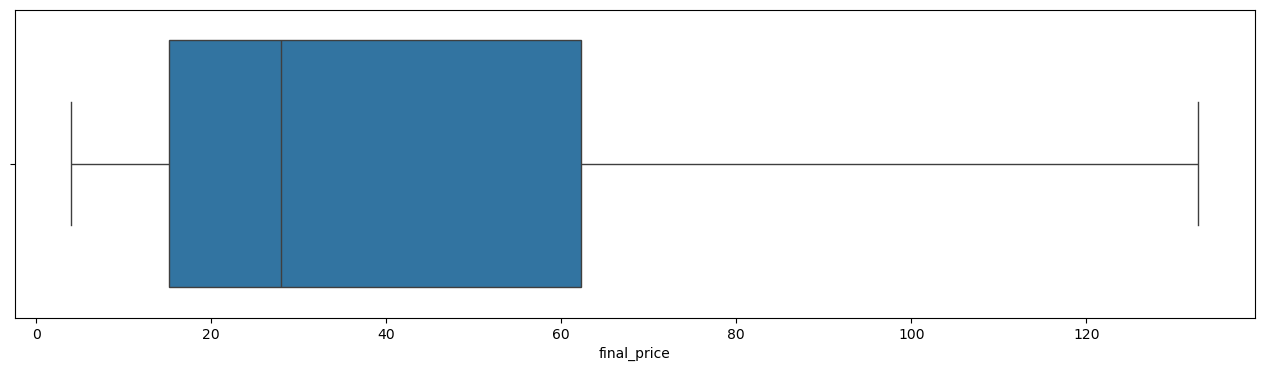

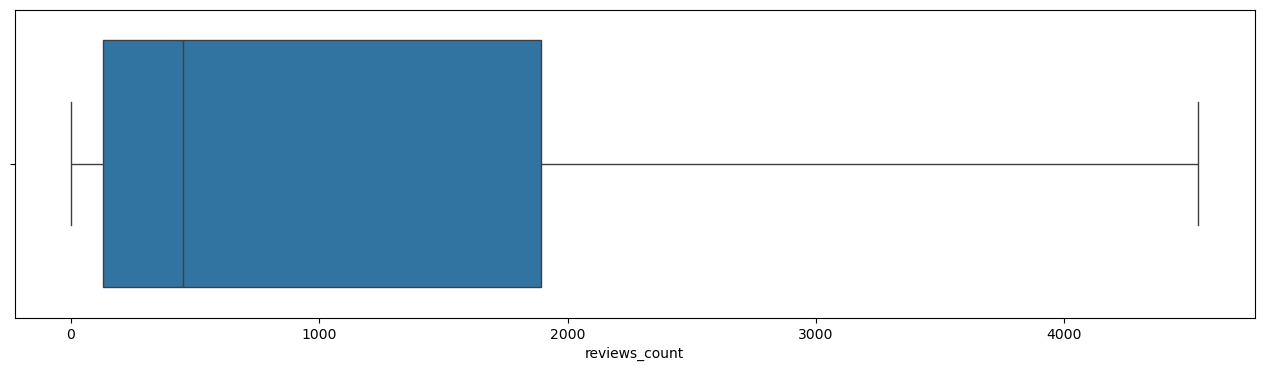

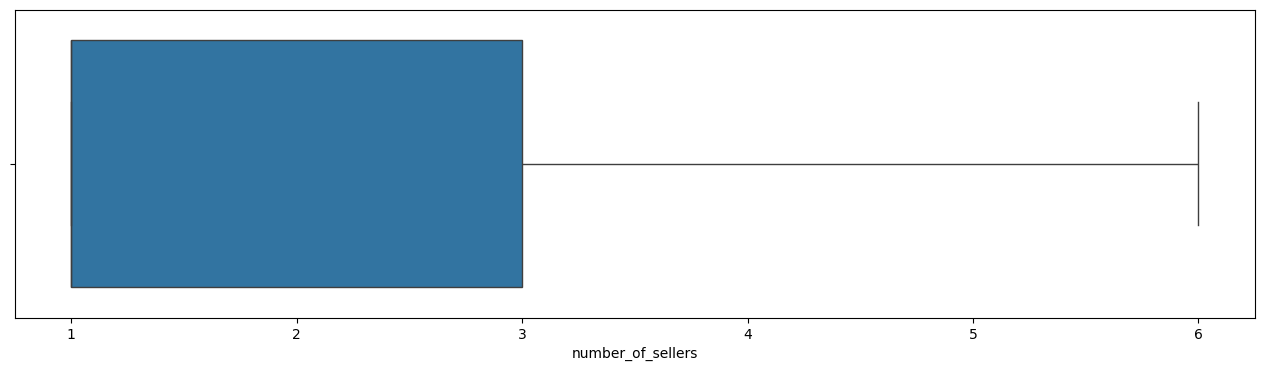

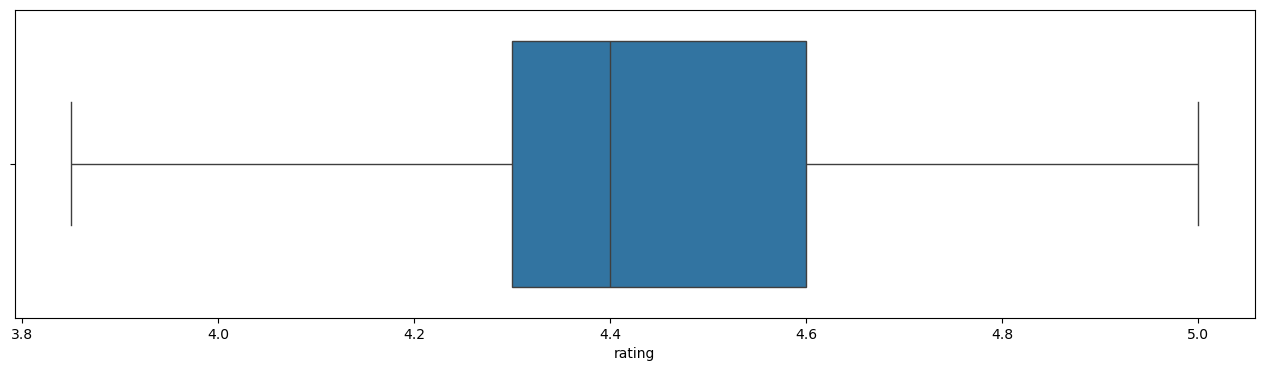

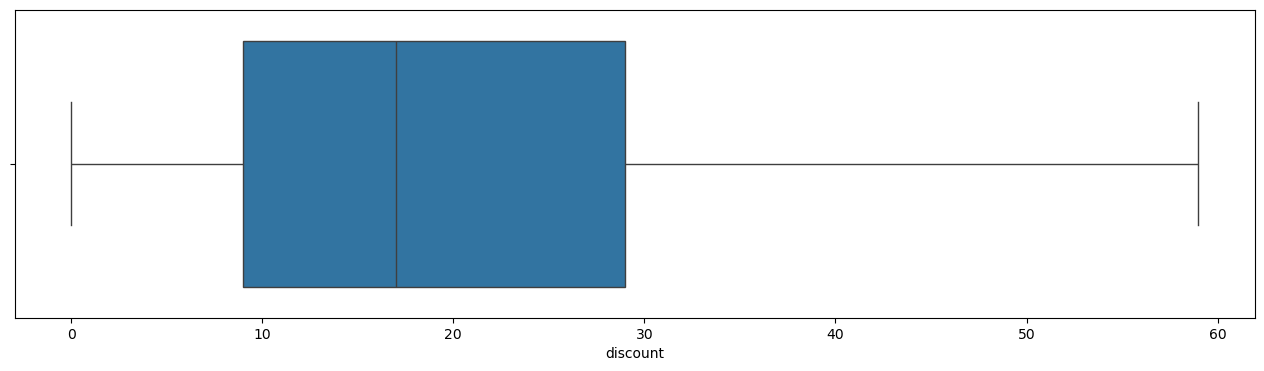

In [794]:
for col in num.columns:
    plt.figure(figsize=(16, 4))
    sns.boxplot(x=num[col])
    plt.show()

### Encoding

In [796]:
cat = df.select_dtypes(exclude = 'number')
cat

,brand,currency,availability,categories
2,TWINSLUXES,USD,in stock,Tools & Home Improvement
3,Accutire,USD,in stock,Automotive
4,SAURA LIFE SCIENCE,INR,in stock,Beauty
5,KASOTT,USD,in stock,Electronics
6,Bio-Oil,USD,in stock,Beauty & Personal Care
...,...,...,...,...
995,Madison Park,USD,limited stock,Home & Kitchen
996,BIC,USD,in stock,Office Products
997,Elmer's,USD,in stock,Tools & Home Improvement
998,HOMEK,USD,in stock,Office Products


In [797]:
cat.columns

Index(['brand', 'currency', 'availability', 'categories'], dtype='object')

In [798]:
cat['currency'].unique()

array(['USD', 'INR', 'GBP'], dtype=object)

In [799]:
cat['currency'].value_counts()

currency
USD    842
INR     31
GBP      2
Name: count, dtype: int64

In [800]:
cat['currency'] = cat['currency'].replace({'USD': 2, 'INR': 1, 'GBP': 0}).astype(float)

In [801]:
cat['availability'].unique()

array(['in stock', 'limited stock', 'out of stock', 'delayed shipping',
       'unknown'], dtype=object)

In [802]:
cat['availability'].value_counts()

availability
in stock            635
limited stock       207
delayed shipping     25
unknown               6
out of stock          2
Name: count, dtype: int64

In [803]:
cat['availability'] = cat['availability'].replace({'in stock': 0, 'limited stock': 1, 'delayed shipping': 2, 'unknown': 3, 'out of stock': 4}).astype(float)

In [804]:
df = pd.concat([cat,num],axis= 1)
df

,brand,currency,availability,categories,initial_price,final_price,reviews_count,number_of_sellers,rating,discount
2,TWINSLUXES,2.0,0.0,Tools & Home Improvement,49.99,33.990,3178.0,1.0,4.2,32.0
3,Accutire,2.0,0.0,Automotive,18.00,18.000,4541.5,1.0,4.4,0.0
4,SAURA LIFE SCIENCE,1.0,0.0,Beauty,171.49,132.815,5.0,1.0,5.0,38.0
5,KASOTT,2.0,0.0,Electronics,17.88,17.880,67.0,3.0,4.3,13.0
6,Bio-Oil,2.0,0.0,Beauty & Personal Care,39.24,24.950,4541.5,1.0,4.6,36.0
...,...,...,...,...,...,...,...,...,...,...
995,Madison Park,2.0,1.0,Home & Kitchen,154.99,111.990,4541.5,4.0,4.4,28.0
996,BIC,2.0,0.0,Office Products,10.99,9.990,4541.5,6.0,4.5,9.0
997,Elmer's,2.0,0.0,Tools & Home Improvement,14.00,14.000,1052.0,1.0,4.6,0.0
998,HOMEK,2.0,0.0,Office Products,40.00,40.000,1039.0,1.0,4.0,13.0


In [805]:
nd = df.select_dtypes(include = 'number')
nd

,currency,availability,initial_price,final_price,reviews_count,number_of_sellers,rating,discount
2,2.0,0.0,49.99,33.990,3178.0,1.0,4.2,32.0
3,2.0,0.0,18.00,18.000,4541.5,1.0,4.4,0.0
4,1.0,0.0,171.49,132.815,5.0,1.0,5.0,38.0
5,2.0,0.0,17.88,17.880,67.0,3.0,4.3,13.0
6,2.0,0.0,39.24,24.950,4541.5,1.0,4.6,36.0
...,...,...,...,...,...,...,...,...
995,2.0,1.0,154.99,111.990,4541.5,4.0,4.4,28.0
996,2.0,0.0,10.99,9.990,4541.5,6.0,4.5,9.0
997,2.0,0.0,14.00,14.000,1052.0,1.0,4.6,0.0
998,2.0,0.0,40.00,40.000,1039.0,1.0,4.0,13.0


In [806]:
df.head()

,brand,currency,availability,categories,initial_price,final_price,reviews_count,number_of_sellers,rating,discount
2,TWINSLUXES,2.0,0.0,Tools & Home Improvement,49.99,33.990,3178.0,1.0,4.2,32.0
3,Accutire,2.0,0.0,Automotive,18.00,18.000,4541.5,1.0,4.4,0.0
4,SAURA LIFE SCIENCE,1.0,0.0,Beauty,171.49,132.815,5.0,1.0,5.0,38.0
5,KASOTT,2.0,0.0,Electronics,17.88,17.880,67.0,3.0,4.3,13.0
6,Bio-Oil,2.0,0.0,Beauty & Personal Care,39.24,24.950,4541.5,1.0,4.6,36.0


In [807]:
df.select_dtypes("O")

,brand,categories
2,TWINSLUXES,Tools & Home Improvement
3,Accutire,Automotive
4,SAURA LIFE SCIENCE,Beauty
5,KASOTT,Electronics
6,Bio-Oil,Beauty & Personal Care
...,...,...
995,Madison Park,Home & Kitchen
996,BIC,Office Products
997,Elmer's,Tools & Home Improvement
998,HOMEK,Office Products


**Considering ordinal Encoding of above columns with avg values of discount**

In [809]:
catcols = df.select_dtypes("O").columns

In [810]:
catcols

Index(['brand', 'categories'], dtype='object')

In [811]:
# Group by -> Average of discount -> Encodings -> Saving encoding -> Replacing Cat Values
import pickle

for col in catcols:
    grouped = round(df.groupby(col)['discount'].mean(),2)
    maps = {k:v for k, v in zip(grouped.index, grouped.values)}
    with open(f"{col}_encoding.pkl", 'wb') as f:
        pickle.dump(maps, f)

    df[col].replace(maps, inplace=True)

In [812]:
df.fillna(0,inplace=True)

In [813]:
df.dtypes

brand                float64
currency             float64
availability         float64
categories           float64
initial_price        float64
final_price          float64
reviews_count        float64
number_of_sellers    float64
rating               float64
discount             float64
dtype: object

In [814]:
y = df['discount']

In [815]:
x = df.drop(columns=['discount'])

In [816]:
x

,brand,currency,availability,categories,initial_price,final_price,reviews_count,number_of_sellers,rating
2,32.0,2.0,0.0,17.15,49.99,33.990,3178.0,1.0,4.2
3,0.0,2.0,0.0,15.29,18.00,18.000,4541.5,1.0,4.4
4,38.0,1.0,0.0,25.39,171.49,132.815,5.0,1.0,5.0
5,13.0,2.0,0.0,18.56,17.88,17.880,67.0,3.0,4.3
6,36.0,2.0,0.0,11.74,39.24,24.950,4541.5,1.0,4.6
...,...,...,...,...,...,...,...,...,...
995,28.0,2.0,1.0,19.30,154.99,111.990,4541.5,4.0,4.4
996,9.0,2.0,0.0,18.45,10.99,9.990,4541.5,6.0,4.5
997,0.0,2.0,0.0,17.15,14.00,14.000,1052.0,1.0,4.6
998,13.0,2.0,0.0,18.45,40.00,40.000,1039.0,1.0,4.0


### Model building

### Linear Regression

In [819]:
df['brand'].fillna(df['brand'].mode(),inplace = True)

In [820]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 2 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              875 non-null    float64
 1   currency           875 non-null    float64
 2   availability       875 non-null    float64
 3   categories         875 non-null    float64
 4   initial_price      875 non-null    float64
 5   final_price        875 non-null    float64
 6   reviews_count      875 non-null    float64
 7   number_of_sellers  875 non-null    float64
 8   rating             875 non-null    float64
dtypes: float64(9)
memory usage: 68.4 KB


In [821]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [822]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 9)

In [823]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700, 9) (175, 9) (700,) (175,)


In [824]:
linear_model = LinearRegression() # model initilization

In [825]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [826]:
test_predictions = linear_model.predict(x_test)

In [827]:
np.round(test_predictions)

array([41., 21., 12., 10., 61., 30., 10.,  1., 28., 15., 21.,  6., -0.,
       35., 21., 32., 23., 31.,  4., 14., 27., 39., 37., 27., 18., 18.,
       24., 19., 13.,  1., 28., 36.,  4.,  4., -1., 29., 20., 49., 14.,
       10., 25., 26., 15., 39., 24., 21., 19., 50.,  5.,  7., 21., 42.,
       20., 21., 15., 24., 65., 50., 19., -0., 13.,  6., 21.,  8., -1.,
        9., 21., 17., 31.,  8., 37., 27.,  9., 36., 56.,  4., 50., 44.,
        5., 44., 13.,  6., 11., 30.,  7., 39., 25.,  8.,  6., 32., 29.,
       63., 10., 15., 11., 32., 22., 29., 14., 10.,  4., 19.,  7., 22.,
        6.,  5., 26.,  8., 26.,  6.,  7., 25., 42.,  5., 12., 12.,  8.,
        9., 32., 13., 26.,  0., 38., 15., 23., 16., 33., 31., 18.,  9.,
       38., 31., 15., 18.,  9., 43.,  5.,  8., 21., 13.,  8., 62., 34.,
        1., 15., 10., 14., 19.,  2.,  8., 20., 10.,  8., 36., 12., 20.,
       32., 34., 23., 13., 11., 24., 38., 29., 20., 31., 19., 25., 49.,
       12., 16., 13., 20., 12., 17.])

In [828]:
y_test

560    43.0
957    20.0
371    13.0
46     10.0
478    59.0
       ... 
43     13.0
98     13.0
626    20.0
490    11.0
949    16.0
Name: discount, Length: 175, dtype: float64

In [829]:
train_predictions = linear_model.predict(x_train)

In [830]:
print("Test Mean Squared Error: ",mean_squared_error(y_test,test_predictions))

Test Mean Squared Error:  11.735009844899489


In [831]:
print("Train Mean Squared Error: ",mean_squared_error(y_train,train_predictions))

Train Mean Squared Error:  13.484165079525654


In [832]:
print("Test R2 Score: ",r2_score(y_test,test_predictions))

Test R2 Score:  0.9415291626298383


In [833]:
print("Train R2 Score: ",r2_score(y_train,train_predictions))

Train R2 Score:  0.9387216488527561


### RIDGE

In [835]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [836]:
rigde_test=ridge_model.predict(x_test)
rigde_train=ridge_model.predict(x_train)

In [837]:
print("Ridge Model MSE of Train: ",mean_squared_error(y_train,rigde_train))

Ridge Model MSE of Train:  13.48416508183484


In [838]:
print("Ridge Model MSE of Test: ",mean_squared_error(y_test,rigde_test))

Ridge Model MSE of Test:  11.7349731308004


In [839]:
print("Ridge Model Train R^2 value: ",r2_score(y_train,rigde_train))

Ridge Model Train R^2 value:  0.9387216488422622


In [840]:
print("Ridge Model Test R^2 value: ",r2_score(y_test,rigde_test))

Ridge Model Test R^2 value:  0.9415293455614375


### Lasso

In [842]:
Lasso_model=Lasso(alpha=0.01)
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [843]:
Lasso_test=Lasso_model.predict(x_test)
Lasso_train=Lasso_model.predict(x_train)

In [844]:
print("Lasso Model MSE of Train: ",mean_squared_error(y_train,Lasso_train))

Lasso Model MSE of Train:  13.489211916524711


In [845]:

print("Lasso Model MSE of Test: ",mean_squared_error(y_test,Lasso_test))

Lasso Model MSE of Test:  11.709615176516984


In [846]:
print("Lasso Model Train R^2 value: ",r2_score(y_train,Lasso_train))

Lasso Model Train R^2 value:  0.938698713665595


In [847]:
print("Lasso Model Test R^2 value: ",r2_score(y_test,Lasso_test))

Lasso Model Test R^2 value:  0.9416556940554348


In [848]:
Lasso_test

array([41.50745012, 20.65266863, 11.79766591, 10.2865355 , 60.8059861 ,
       29.80576099, 10.34173025,  0.83207373, 27.85084111, 15.20242767,
       20.4677937 ,  5.6930757 , -0.28814412, 35.47457537, 21.08447502,
       32.11639372, 22.92152029, 30.90145972,  4.27995955, 13.87591833,
       27.14458759, 38.74491798, 37.33478634, 27.46457136, 17.91164867,
       17.8025518 , 24.40847745, 19.08730333, 13.15988868,  1.05912642,
       27.82345146, 35.61541195,  4.41516164,  4.35390429, -0.81135199,
       29.41107024, 20.1764145 , 48.77615266, 14.07414239,  9.92332932,
       25.02768869, 26.13691593, 14.57892768, 38.6887624 , 24.40949992,
       21.08180574, 19.3517744 , 49.4816603 ,  5.40238153,  7.48164019,
       20.9651597 , 42.0518028 , 19.62249956, 21.14708782, 14.49125515,
       24.33252085, 64.50532279, 49.70753908, 18.90704656, -0.31554189,
       13.12370689,  5.53819595, 21.17274867,  7.66884475, -1.16256496,
        9.22829353, 21.10338485, 17.15889808, 31.13587543,  8.13

In [849]:
y_test

560    43.0
957    20.0
371    13.0
46     10.0
478    59.0
       ... 
43     13.0
98     13.0
626    20.0
490    11.0
949    16.0
Name: discount, Length: 175, dtype: float64

### Decision Tree

In [851]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Model Fit Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning max_depth or trying ensemble methods.")


Train R² Score: 0.9409
Test R² Score: 0.8719
Train RMSE: 3.5511
Test RMSE: 5.3871
Cross-Validation R² Scores: [0.87135559 0.91211175 0.85176584 0.90419105 0.8888531 ]
Mean Cross-Validation R² Score: 0.8857
The model has a MODERATE FIT. Consider tuning max_depth or trying ensemble methods.


### Random forest

In [853]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predict on the train and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Diagnose model fit
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning hyperparameters.")


Train R² Score: 0.9847
Test R² Score: 0.9030
Train RMSE: 1.8101
Test RMSE: 4.6883
Cross-Validation R² Scores: [0.90458284 0.89929271 0.89100375 0.91995246 0.88773191]
Mean Cross-Validation R² Score: 0.9005
The model is a GOOD FIT.


### SVM

In [855]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize and train SVR model
svm_model = SVR(kernel='rbf')
svm_model.fit(x_train, y_train)

# Predict
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

# R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(svm_model, x_scaled, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Model Fit Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning kernel, C, epsilon, or trying other models.")


Train R² Score: 0.8123
Test R² Score: 0.7940
Train RMSE: 6.3300
Test RMSE: 6.8316
Cross-Validation R² Scores: [0.75583147 0.8154262  0.81509601 0.79045367 0.78661035]
Mean Cross-Validation R² Score: 0.7927
The model has a MODERATE FIT. Consider tuning kernel, C, epsilon, or trying other models.


### xgboost

In [857]:
pip install xgboost


In [858]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation (5-fold)
cv_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Diagnose model fit
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning hyperparameters or trying other models.")



Train R² Score: 0.9920
Test R² Score: 0.9100
Train RMSE: 1.3055
Test RMSE: 4.5157
Cross-Validation R² Scores: [0.89750958 0.90814259 0.90786583 0.93639294 0.88250889]
Mean Cross-Validation R² Score: 0.9065
The model is a GOOD FIT.


### KNN

In [860]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor


# Standardize features (important for KNN)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Predict on train and test set
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation (5-fold)
cv_scores = cross_val_score(knn_model, x_scaled, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Model Fit Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. You might try tuning 'n_neighbors'.")


Train R² Score: 0.8791
Test R² Score: 0.7909
Train RMSE: 5.0800
Test RMSE: 6.8818
Cross-Validation R² Scores: [0.75739371 0.76940175 0.85352625 0.82302835 0.80298284]
Mean Cross-Validation R² Score: 0.8013
The model has a MODERATE FIT. You might try tuning 'n_neighbors'.


**Saving Better Performance Model**
- Xgboost

In [862]:
import joblib

joblib.dump(xgb_model, "xgb.pkl")

['xgb.pkl']

In [863]:
import pickle

In [864]:
with open("xgb.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [865]:
df.isnull.sum


AttributeError: 'function' object has no attribute 'sum'